<h1 style="color:rgb(0,120,170)">Assignment 4: Decision Trees and other classifiers on real dataset</h1>

This material, no matter whether in printed or electronic form,
may be used for personal and non-commercial educational use
only. Any reproduction of this material, no matter whether as a
whole or in parts, no matter whether in printed or in electronic
form, requires explicit prior acceptance of the authors.

<h2 style="color:rgb(0,120,170)">Automatic Testing Guidelines</h2>

Automatic unittesting requires you to submit a notebook which contains strictly defined objects.
Strictness of definition consists of unified shapes, dtypes, variable names and more.

Within the notebook, we provide detailed instruction which you should follow in order to maximise your final grade.

**Name your notebook properly**, follow the pattern in the template name:

**Assignment_N_NameSurname_matrnumber**
<ol>
    <li>N - number of assignment</li>
    <li>NameSurname - your full name where every part of the name starts with a capital letter, no spaces</li>
    <li>matrnumber - you student number on ID card (with k, potentially with a leading zero)</li>
</ol>

Don't add any cells but use the ones provided by us. All cells have a unique ID so that the unit test can find it, so please do not add or remove any cell!

Always make sure that implemented functions have the correct output and given variables contain the correct data type. In the descriptions for every function you can find information on what datatype an output should have and you should stick to that in order to minimize conflicts with the unittest. Don't import any other packages than listed in the cell with the "imports" tag.

Questions are usually multiple choice (except the task description says otherwise) and can be answered by changing the given variables to either "True" or "False". "None" is counted as a wrong answer in any case!

**Note:** Never use variables you defined in another cell in your functions directly; always pass them to the function as a parameter. In the unitest, they won't be available either. If you want to make sure that everything is executable for the unittest, try executing cells/functions individually (instead of running the whole notebook).

<h2 style="color:rgb(0,120,170)">Dataset</h2>

For this notebook to compile without problems, make sure that the required dataset files are stored in a folder called `dataset`! Also make sure that this folder and the additional Python file, provided via Moodle, are in the same folder as the notebook!

<h2 style="color:rgb(0,120,170)">Task 1: Gini Impurity</h2>

In this task, we will recall the most important concepts of decision trees by walking you through a simple example. On the way you have to solve some exercises to gain basic insights. Let's start with a simple toy dataset for one tree and give a defintion of the concepts needed for the following tasks.

* **Code 1.1**:
Implement the necessary calculations in the function `calc_gini` and return the 4 solutions (**Note:** Your implementation should work for any dataset similar to the toy dataset (i.e. binary labels, two dimensional)):
    1. Calculate the Gini impurity for our toy dataset.
    2. Calculate the Gini impurity for the top/right leaf in a given $x_2$- or $x_1$-split.
    3. Calculate the Gini impurity for the bottom/left leaf in a given $x_2$- or $x_1$-split.
    4. Calculate the Gini impurity gain for a given split in the toy dataset.
* **Question 1.1**:
    * Answer some questions about the results of **Code 1.1**.

In [1]:
# Nothing to do here, just run the cell.
import time
import numpy as np

import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

from mnist_loader import MNIST
import matplotlib.pyplot as plt
# Set random seed to ensure reproducible runs
RSEED = 50

In [2]:
# Nothing to do here, just run the cell.
X_toy = np.array(
    [[2, 2],
     [2, 1],
     [2, 3],
     [1, 2],
     [1, 1],
     [3, 3],
     [3, 2]]
)

y_toy = np.array([0, 1, 1, 1, 0, 1, 0])

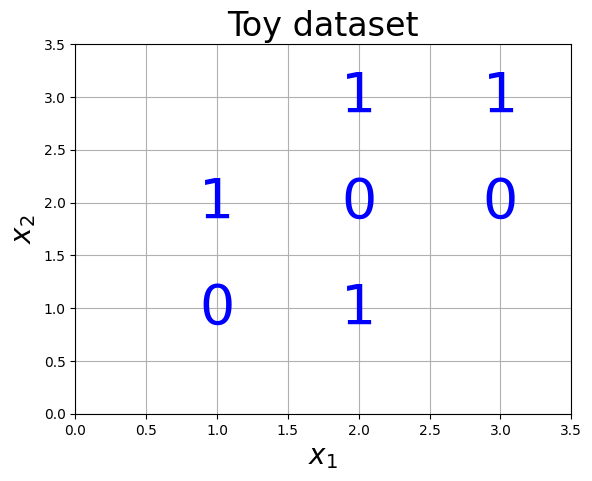

In [3]:
# Nothing to do here, just run the cell.
# Plot each point as the label.
for x1, x2, label in zip(X_toy[:, 0], X_toy[:, 1], y_toy):
    plt.text(x1, x2, str(label), fontsize = 40, color = 'b',
             ha='center', va='center')
    
plt.grid()
plt.xlim((0, 3.5))
plt.ylim((0, 3.5))
plt.xlabel('$x_1$', size = 20); plt.ylabel('$x_2$', size = 20)
plt.title('Toy dataset', size = 24)
plt.show()

A **Decision Tree Classifier (DTC)** builds a decision tree based on the features of the data. This is equivalent to subdividing the feature space. Let's consider the example above and apply a simple heuristics. In the first step we try to subdivide the space such that we obtain the _largest possible leaf (subdivision)_ that contains only **one class**.
<br><br>
We first look at the feature $x_2$, i.e. a horizontal division of the space. For example, we could divide the space at the specific threshold $x_2 = 2.5$. Then we end up having a group of samples with features $x_2 > 2.5$ and homogenous class label 1, i.e. the two points with coordinates $\{ (2,3), (3,3) \}$ . If we instead look at the feature $x_1$, corresponding to a vertical division of the space, we cannot find an equally large or larger group of samples with the same label. Therefore, our first node in the tree is: $x_2 \leq 2.5$, i.e. we split the space and repeat the same procedure on each of the two leafs. In our case we are done with the top leaf (since both samples have the same class) and only need to repeat the procedure on the bottom leaf.

Our simple heuristics from above fails on the bottom node. We need a better criterion to decide which splits to make. <br> Nowadays the most frequently used one is called the **Gini Impurity**. 

The Gini Impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled, if it was randomly labeled according to the distribution of labels in the subset.
<br>

What does that mean? 
1. Let us suppose we have $2$ labels and let $p_1, p_2$ be the fractions of points labeled with labels $1$ and $2$ (note: $p_1 + p_2 = 1$) . 
2. The probabilty to choose a point with label $1$ is $p_1$. 
3. The probability to choose label $2$ is $p_2 = 1-p_1$. 
4. Therefore, the probability to label a point of label $1$ with label $2$ is $p_1 \cdot p_2 = p_1 \cdot (1-p_1) = p_1 - p_1^2$. 
5. Analogously, the probability for points with label $2$ to be labeled with $1$ is $p_2 \cdot (1-p_2) = p_2 - p_2^2$. <br> 
6. The Gini Impurity is the sum over both: $p_1 - p_1^2 + p_2 - p_2^2 = p_1 + p_2 - p_1^2 - p_2^2 = 1 - p_1^2 -p_2^2$

The above reasoning is easy to generalize to the case where the number of labels $M$ is larger than two: $M>2$. <br>
The formula for the given dataset $Z$ is simply $I_G(Z)=1-\sum_{k = 1}^M p_k(Z)^2$, where $p_k(Z)$ is the frequency of points with labels $k$ in the dataset $Z$. <br> 

The Gini Impurity Gain is the amount of "impurity" we get rid of for a specific split $s$.

Let's assume that we get the partition $Z_{s,1}, \ldots, Z_{s,K_s}$ of $Z$ after applying $s$. 

Then the impurity gain is $g_G(Z,s) = I_G(Z) - \sum_{t=1}^{K_s} \frac{|Z_{s,t}|}{|Z|} \cdot I_G(Z_{s,t})$




<h3 style="color:rgb(210,90,80)">Code 1.1 (15 Points):</h3>

In [4]:
def calc_gini(X: np.ndarray, y: np.ndarray, split: float, axis: int) -> tuple[float, float, float, float]:
    """Function that calculates the Gini Impurity of the whole dataset and of the two subsets after a given split is performed.
    Also returns the impurity gain from this specific split.

    Parameters
    ----------
    X : (N, 2) np.ndarray
        Data matrix.
    y : (N,) np.ndarray
        Binary labels.
    split : float
        Value at which the split is performed
    axis : int
        Axis on which the split is performed, 0 for the first feature (=x1), 1 for the second feature (=x2).
        
    Returns
    -------
    tuple of float
        - gini_impurtiy : float
            The gini impurity of the whole dataset.
        - gini_impurity_top / gini_impurity_right : float
            The gini impurity for the top or right split depending on the axis.
        - gini_impurity_bottom / gini_impurity_left : float
            The gini impurity for the bottom or left split depending on the axis.
        - impurity_gain : float
            The impurity gain of the performed split.
    """
    
    # YOUR CODE HERE
    # Calculate Gini impurity for the entire dataset
    unique, counts = np.unique(y, return_counts=True)
    p = counts / counts.sum()
    gini_total = 1 - np.sum(p**2)
    
    # Perform the split
    if axis == 0:
        # Split based on x1
        left_mask = X[:, axis] <= split
        right_mask = X[:, axis] > split
        subset_left = y[left_mask]
        subset_right = y[right_mask]
        
        # Naming based on axis
        gini_subset_bottom = 1 - np.sum((np.unique(subset_left, return_counts=True)[1]/len(subset_left))**2) if len(subset_left) > 0 else 0
        gini_subset_right = 1 - np.sum((np.unique(subset_right, return_counts=True)[1]/len(subset_right))**2) if len(subset_right) > 0 else 0
        
        # Calculate impurity gain
        impurity_gain = gini_total - (len(subset_left)/len(y)) * gini_subset_bottom - (len(subset_right)/len(y)) * gini_subset_right
        
        return (gini_total, gini_subset_right, gini_subset_bottom, impurity_gain)
    
    elif axis == 1:
        # Split based on x2
        bottom_mask = X[:, axis] <= split
        top_mask = X[:, axis] > split
        subset_bottom = y[bottom_mask]
        subset_top = y[top_mask]
        
        # Naming based on axis
        gini_subset_top = 1 - np.sum((np.unique(subset_top, return_counts=True)[1]/len(subset_top))**2) if len(subset_top) > 0 else 0
        gini_subset_bottom = 1 - np.sum((np.unique(subset_bottom, return_counts=True)[1]/len(subset_bottom))**2) if len(subset_bottom) > 0 else 0
        
        # Calculate impurity gain
        impurity_gain = gini_total - (len(subset_top)/len(y)) * gini_subset_top - (len(subset_bottom)/len(y)) * gini_subset_bottom
        
        return (gini_total, gini_subset_top, gini_subset_bottom, impurity_gain)
    
    else:
        raise ValueError("Axis must be 0 (x1) or 1 (x2).")

In [5]:
# DO NOT DELETE THIS CELL!
x1_split_point= 1.5
gini_impurity, gini_right, gini_left, impurity_gain_0 = calc_gini(X_toy, y_toy, x1_split_point, 0)

x2_split_point= 2.5
_, gini_top, gini_bottom, impurity_gain_1 = calc_gini(X_toy, y_toy, x2_split_point, 1)

assert isinstance(gini_impurity, float), "The gini impurity is not a float!"
assert np.isclose(gini_impurity, 0.4898, atol=1e-4), "The gini impurity is not correct!"

In [6]:
# DO NOT DELETE THIS CELL!
assert isinstance(gini_right, float), "The gini impurity for the right split is not a float!"
assert np.isclose(gini_right, 0.4800, atol=1e-4), "The gini impurity for the right split is not correct!"
assert np.isclose(gini_top, 0, atol=1e-4), "The gini impurity for the top split is not correct!"

In [7]:
# DO NOT DELETE THIS CELL!
assert isinstance(gini_left, float), "The gini impurity for the left split is not a float!"
assert np.isclose(gini_left, 0.5, atol=1e-4), "The gini impurity for the left split is not correct!"
assert np.isclose(gini_bottom, 0.48, atol=1e-4), "The gini impurity for the bottom split is not correct!"

In [8]:
# DO NOT DELETE THIS CELL!
assert isinstance(impurity_gain_0, float), "The gini impurity gain is not a float!"
assert np.isclose(impurity_gain_0, 0.0041, atol=1e-4), "The gini impurity gain for the vertical split is not correct!"
assert np.isclose(impurity_gain_1, 0.1469, atol=1e-4), "The gini impurity gain for the horizontal split is not correct!"

In [9]:
# Nothing to do here, just run the cell.
print(f"Results for x1 = {x1_split_point}:\n")
print(
    f"Gini impurity for the entire dataset: {gini_impurity:0.4f}\n"
    f"Gini impurity right leaf: {gini_right:0.4f}\n"
    f"Gini impurity left leaf: {gini_left:0.4f}\n"
    f"Gini impurity gain: {impurity_gain_0:0.4f}\n\n"
)

print(f"Results for x2 = {x2_split_point}:\n")
print(
    f"Gini impurity for the entire dataset: {gini_impurity:0.4f}\n"
    f"Gini impurity top leaf: {gini_top:0.4f}\n"
    f"Gini impurity bottom leaf: {gini_bottom:0.4f}\n"
    f"Gini impurity gain: {impurity_gain_1:0.4f}"
)

Results for x1 = 1.5:

Gini impurity for the entire dataset: 0.4898
Gini impurity right leaf: 0.4800
Gini impurity left leaf: 0.5000
Gini impurity gain: 0.0041


Results for x2 = 2.5:

Gini impurity for the entire dataset: 0.4898
Gini impurity top leaf: 0.0000
Gini impurity bottom leaf: 0.4800
Gini impurity gain: 0.1469


<h3 style="color:rgb(210,90,80)">Question 1.1 (3 Points):</h3>

***Based on the results of Gini impurity for the two different split locations of $x_2$, which of the following statements are correct?***

a1_) The right leaf of the split at $x_1=1.5$ has smaller Gini impurity than the top leaf of the split at $x_2=2.5$ <br>
b1_) The Gini impurity of the entire dataset does not depend on the split location. <br>
c1_) The Gini impurity gain of the split at $x_1=1.5$ is smaller than at $x_2=2.5$, indicating that $x_1=1.5$ is a worse splitting point.

To answer the question, assign `True` or `False` boolean values to variables in the next cell. For example, if you think that **a1_)** is correct, define a variable `a1_` and set it to `True`, the same applies to **b1_)** and the other options. A non-correctly answered question as well as no answer (i.e. answer “None”) yields 0 points for a specific question.<br>

In [10]:
# YOUR CODE HERE
a1_ = False
b1_ = True
c1_ = True

In [11]:
# DO NOT DELETE THIS CELL!
assert a1_ is not None, "Store True/False!"
assert a1_ in [True, False], "Invalid Answer!"

In [12]:
# DO NOT DELETE THIS CELL!
assert b1_ is not None, "Store True/False!"
assert b1_ in [True, False], "Invalid Answer!"

In [13]:
# DO NOT DELETE THIS CELL!
assert c1_ is not None, "Store True/False!"
assert c1_ in [True, False], "Invalid Answer!"

<h2 style="color:rgb(0,120,170)">Task 2: Train a simple decision tree </h2>

Next, you should provide a Python routine for the previous example.
* **Code 2.1**: In the cells below is the function `dec_tree` where you have to implement the following:
    * Train a decision tree (have a look at [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)) on the given dataset $X_{train}, y_{train}$ and remember to pass the random seed `seed` defined as function parameter.
    * Return the fitted DecisionTreeClassifier, the number of tree nodes, the maximum depth of the tree, and the accuracy of the tree on the given $X_{test}, y_{test}$.

<h3 style="color:rgb(210,90,80)">Code 2.1 (12 Points):</h3>

In [14]:
def dec_tree(X_train: np.ndarray, y_train: np.ndarray, X_test: np.ndarray, y_test: np.ndarray, seed: int) -> tuple[DecisionTreeClassifier, int, int, float]:
    """Trains a decision tree and returns certain attributes of the received model.
    
    Important: Use sklearn's DecisionTreeClassifier for this task, don't forget to feed it the given seed.
    
    Parameters
    ----------
    X_train : (N, K) np.ndarray
        Data matrix used for fitting the tree.
    y_train : (N,) np.ndarray
        Binary labels of the train data.
    X_test : (N, K) np.ndarray
        Data matrix used for computing the accuracy of the tree.
    y_test : (N,) np.ndarray
        Binary labels of the test data.
    seed : int
        Seed for reproducibility.
        
    Returns
    -------
    tuple of DecisionTreeClassifier, int, float
        - tree : DecisionTreeClassifier
            The fitted tree.
        - nr_nodes : int
            The number of nodes in the fitted decision tree.
        - max_depth : int
            The max depth of the tree.
        - accuracy : float
            The achieved accuracy on the given dataset.
    """
    # YOUR CODE HERE
    # 初始化决策树分类器，设置随机种子
    tree = DecisionTreeClassifier(random_state=seed)
    
    # 在训练数据上训练模型
    tree.fit(X_train, y_train)
    
    # 获取节点数和最大深度
    nr_nodes = tree.tree_.node_count
    max_depth = tree.tree_.max_depth
    
    # 在测试数据上进行预测并计算准确率
    y_pred = tree.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return (tree, nr_nodes, max_depth, accuracy)

In [15]:
# DO NOT DELETE THIS CELL!
fitted_tree, nr_nodes, max_depth, acc = dec_tree(X_toy, y_toy, X_toy, y_toy, RSEED)
assert isinstance(fitted_tree, DecisionTreeClassifier), "The returned tree is not of type DecisionTreeClassifier!"
assert isinstance(nr_nodes, int), "The number of nodes is not an integer!"
assert nr_nodes == 11, "The number of nodes is wrong!"

In [16]:
# DO NOT DELETE THIS CELL!
assert isinstance(max_depth, int), "The max depth is not an integer!"
assert max_depth == 4, "The max depth is wrong!"

In [17]:
# DO NOT DELETE THIS CELL!
assert isinstance(acc, float), "The accuracy is not a float!"
assert acc == 1, "The accuracy is wrong!"

In [18]:
# Nothing to do here, just run the cell.
print(f'Decision tree has {nr_nodes} nodes with maximum depth {max_depth}.')
print(f'Model accuracy: {acc}')

Decision tree has 11 nodes with maximum depth 4.
Model accuracy: 1.0


<h2 style="color:rgb(0,120,170)">Task 3: Decision tree on a real data set</h2>

Now we will apply the classifier to a well known real-world benchmark data set, namely the "Fashion MNIST" dataset. It consists of images of clothing, like sneakers and shirts. It was created to be an alternative to the famous MNIST benchmark dataset, which is nowadays considered as too easy for the most recent algorithms. Let us first load the train and test set, using the files provided on Moodle. The train and test datasets are represented as flattened pixel arrays ($28\times28=784\,\text{pixels}$), and the label vector indicates the different classes (0 to 9). The following cells train and evaluate a simple DecisionTreeClassifier on a small subset of the Fashion MNIST dataset, to give you a baseline.

* **Code 3.1**:
    In order to obtain a better performance, we apply a hyperparameter search. 
    * To this end implement a factory function called `create_param_grid` that simply creates a parameter grid (dictionary) which contains the following quantities:
        - `criterion`: 'gini' and 'entropy'
        - `max_depth`: 10, 50 and 100
        - `splitter`: 'random' and 'best'
        - **Hint:** Have a look at the documentation of [RandomizedSearchCV](https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) to get an idea on how this parameter grid should look like.
    * Implement the function `train_dec_tree` that applies [RandomizedSearchCV](https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) to train a DecisionTreeClassifier using Cross-Validation and returns the best fitted model on the train data and its `best_params_` dictionary (have a look at the documentation).
    * Again, don't forget to pass the seed in **(both!)** the **DecisionTreeClassifier** and **RandomizedSearchCV**.

In [19]:
# Nothing to do here, just run the cell.
data = MNIST('./dataset/')
img_train, labels_train = data.load_training()
n_train = 12000
n_test = 2000
X_train = np.array(img_train)[:n_train]
y_train = np.array(labels_train)[:n_train]
print(X_train.shape, y_train.shape)

img_test, labels_test = data.load_testing()
X_test = np.array(img_test)[:n_test]
y_test = np.array(labels_test)[:n_test]
print(X_train.shape, y_test.shape)

(12000, 784) (12000,)
(12000, 784) (2000,)


To know what we are dealing with, let us plot some of the images:

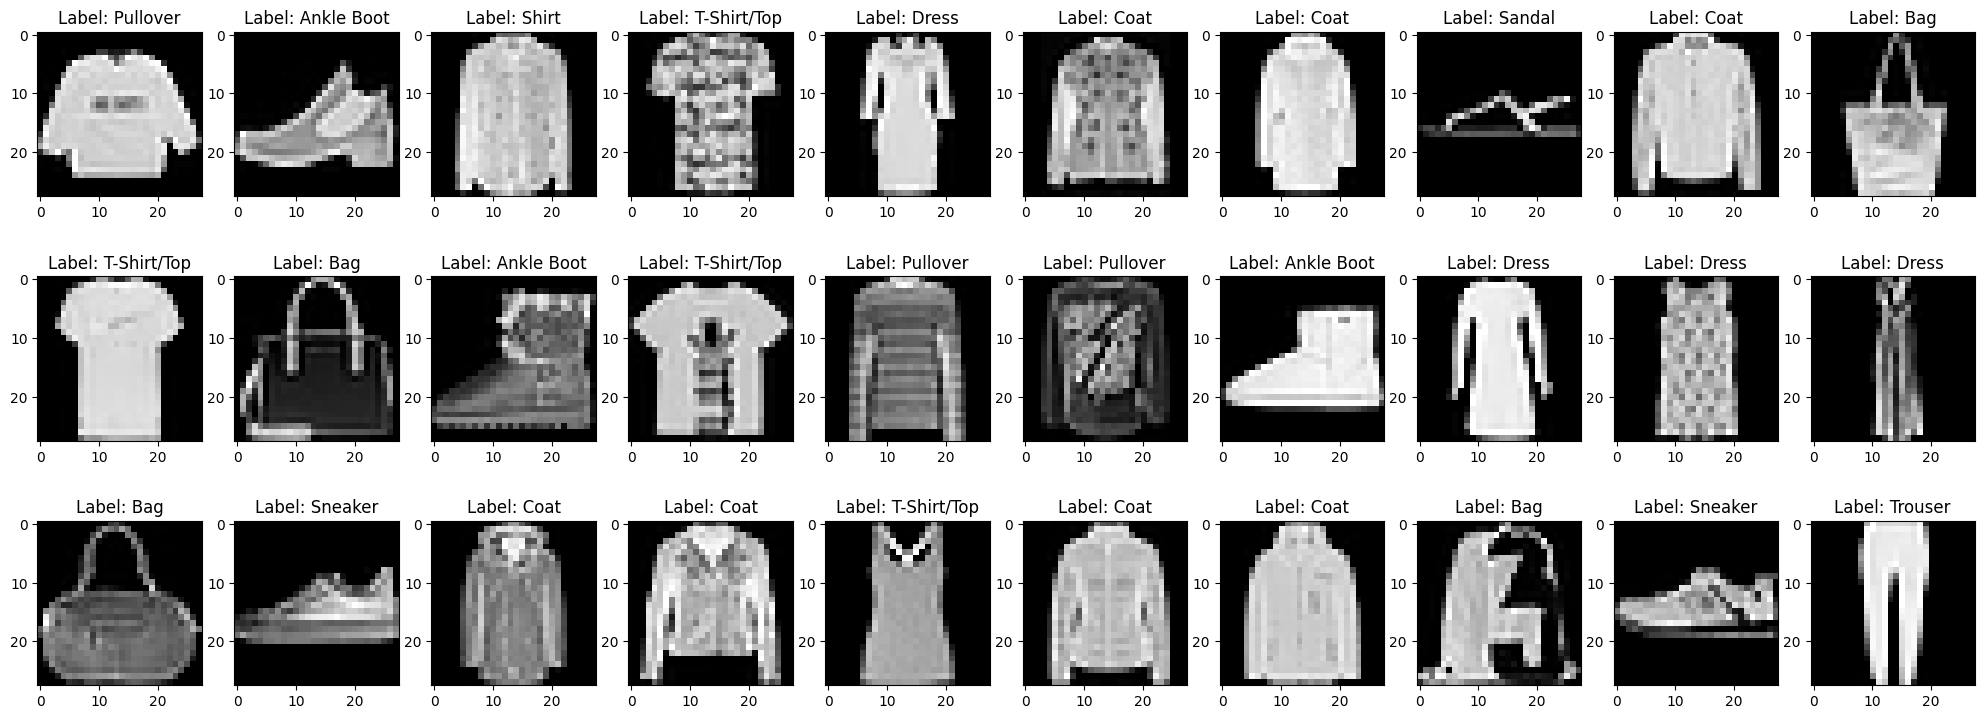

In [20]:
# Nothing to do here, just run the cell.
labels = ['T-Shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
plt.figure(figsize=(25, 9))
for i in range(30):
    plt.subplot(3, 10, i + 1)
    two_d = (np.reshape(X_train[i], (28, 28))).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest', cmap='gray')
    plt.title('Label: {0}'.format(labels[y_train[i]]))
    
plt.show()

The function `get_evaluation` should additionally help you to compute accuracies and provide confusion matrices and appropriate heatmaps.

In [21]:
# Nothing to do here, just run the cell.
def get_evaluation(model: sklearn.base.BaseEstimator, X_test: np.ndarray, y_test: np.ndarray) -> tuple[float, float]:
    """Evaluates the given model and plots a confusion matrix. Also measures the time taken for prediction and the achieved accuracy and returns both.

    Parameters
    ----------
    model : sklearn.base.BaseEstimator
        Trained model that implements the `predict` method.
    X_test : (N, K) np.ndarray
        Data matrix for testing.
    y_test : (N,) np.ndarray
        True labels for the test data.

    Returns
    -------
    tuple of float
        - accuracy : float
            The accuracy of the fitted classifier on the given test set.
        - inference_time : float
            The time it took to compute the predictions.
    """
    start = time.time()
    y_pred = model.predict(X_test)
    inference_time = time.time()-start
    accuracy = accuracy_score(y_test, y_pred)
    conf_mat = confusion_matrix(y_test, y_pred)

    print('\nAccuracy of classifier on test image data: ', accuracy)
    print('\nConfusion matrix: \n', conf_mat)
    print('\nTime: ', inference_time)
    print()

    plt.matshow(conf_mat)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    return accuracy, inference_time


Accuracy of classifier on test image data:  0.74

Confusion matrix: 
 [[137   2   2  14   3   0  35   0   2   0]
 [  1 179   2   5   0   0   2   0   0   0]
 [  8   0 118   2  39   1  31   1   4   1]
 [ 15   8   4 154  11   0   6   0   2   0]
 [  1   0  37   8 121   0  27   0   5   0]
 [  1   0   1   1   0 167   0  18   6   8]
 [ 34   2  24   9  28   0 108   0   8   0]
 [  0   0   0   0   1  18   1 160   0  24]
 [  3   0   5   4   4   3   7   1 160   1]
 [  1   0   0   0   0   8   1  17   2 176]]

Time:  0.0030364990234375



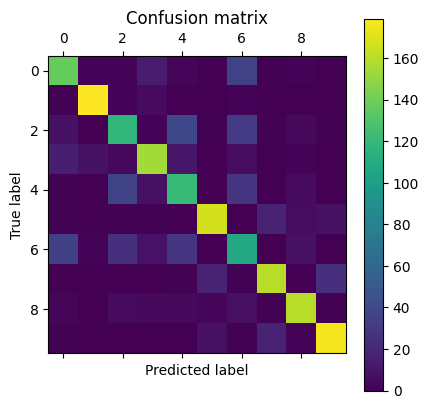

In [22]:
# Nothing to do here, just run the cell.
model, _, _, _ = dec_tree(X_train, y_train, X_test, y_test, RSEED)
acc_fixed, time_fixed = get_evaluation(model, X_test, y_test)

<h3 style="color:rgb(210,90,80)">Code 3.1 (25 Points):</h3>

In [23]:
def create_param_grid() -> dict:
    """Creates a parameter grid for hyperparameter tuning of a decision tree classifier.

    Returns
    -------
    dict
        Dictionary containing parameter names (`criterion`, `max_depth`, `splitter`) 
        and their respective values to be used in grid search.
        - 'criterion': list of str
            Specifies the function to measure the quality of a split. Options are 'entropy' and 'gini'.
        - 'max_depth': list of int
            Specifies the maximum depth of the tree. Options are 10, 50, and 100.
        - 'splitter': list of str
            Specifies the strategy used to split at each node. Options are 'random' and 'best'.
    """
    # YOUR CODE HERE
    param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [10, 50, 100],
        'splitter': ['random', 'best']
    }
    return param_grid

In [24]:
# DO NOT DELETE THIS CELL!
param_grid = create_param_grid()
assert isinstance(param_grid, dict), "The parameter grid is not a dictionary!"
assert len(param_grid.keys()) == 3, "The number of keys is not correct!"
assert set(param_grid["criterion"]) == {"entropy", "gini"}, "The criterion does not have the correct options!"
assert set(param_grid["max_depth"]) == {10, 50, 100}, "The max_depth does not have the correct options!"
assert set(param_grid["splitter"]) == {"random", "best"}, "The splitter does not have the correct options!"

In [25]:
def train_dec_tree(X_train: np.ndarray, y_train: np.ndarray, param_grid: dict, n_iter: int, cv: int, seed: int) -> tuple[RandomizedSearchCV, dict]:
    """Trains a decision tree using cross-validation and returns the best model as well as the best parameter combination. 
    
    Important: Again use (only!) the implementations from sklearn already imported for this assignment and don't forget the seed in (both!) the DecisionTreeClassifier and the RandomizedSearchCV.

    Parameters
    ----------
    X_train : (N, K) np.ndarray
        Data matrix used for fitting the tree.
    y_train : (N,) np.ndarray
        Labels of the train data.
    param_grid : dict
        Dictionary of parameters for the grid search (RandomizedSearchCV).
    n_iter : int
        Number of iterations (RandomizedSearchCV)
    cv : int
        Number of folds in CV (RandomizedSearchCV)
    seed : int
        Seed for reproducibility, feed to both RandomizedSearchCV and the DecisionTreeClassifier!

    Returns
    -------
    tuple of RandomizedSearchCV, dict, float
        - model : RandomizedSearchCV
            Fitted best model.
        - best_params : dict
            Best model parameters as dict.
    """
    # YOUR CODE HERE
    # 初始化决策树分类器，设置随机种子
    dt_classifier = DecisionTreeClassifier(random_state=seed)
    
    # 初始化 RandomizedSearchCV，设置随机种子
    random_search = RandomizedSearchCV(
        estimator=dt_classifier,
        param_distributions=param_grid,
        n_iter=n_iter,
        cv=cv,
        random_state=seed,
        n_jobs=-1  # 使用所有可用的核
    )
    
    # 在训练数据上进行超参数搜索
    random_search.fit(X_train, y_train)
    
    # 获取最佳参数
    best_params = random_search.best_params_
    
    return (random_search, best_params)

In [26]:
# DO NOT DELETE THIS CELL!
model_dec_tree, params_dec_tree = train_dec_tree(X_train, y_train, param_grid, 5, 3, RSEED)
assert isinstance(model_dec_tree, RandomizedSearchCV), "The best decision tree should be of type RandomizedSearchCV!"
assert isinstance(params_dec_tree, dict), "The best params should be a dictionary!"

The best parameters are: {'splitter': 'best', 'max_depth': 50, 'criterion': 'entropy'}

Accuracy of classifier on test image data:  0.761

Confusion matrix: 
 [[142   1   5   7   5   0  33   1   1   0]
 [  1 173   0  12   1   0   1   0   1   0]
 [  9   0 124   2  33   0  31   0   5   1]
 [  5   8   2 159  16   0   9   0   1   0]
 [  2   1  37   6 135   0  17   0   1   0]
 [  2   1   1   0   0 170   0  15   4   9]
 [ 26   3  28  11  26   2 113   0   4   0]
 [  0   0   0   0   0  22   0 161   0  21]
 [  3   1   5   0   3   2   6   0 166   2]
 [  0   0   0   1   0   7   0  17   1 179]]

Time:  0.0053861141204833984



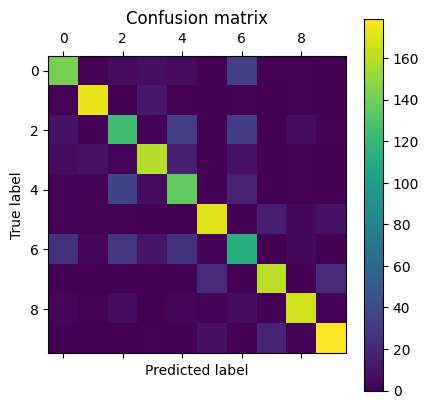

In [28]:
# Nothing to do here, just run the cell.
print("The best parameters are: {}".format(params_dec_tree))
acc_best, time_best = get_evaluation(model_dec_tree, X_test, y_test)

If you did the task correctly, you should obtain a slightly better accuracy than before.

<h2 style="color:rgb(0,120,170)">Task 4: Comparison of different classifiers</h2>

In this task we compare the performace of the Decision Tree Classifier to two other classifiers, namely KNN and SVM, also evaluated on the Fashion MNIST dataset:

* **Code 4.1**:
    * Implement a function `train_kNN` that creates and fits a KNN classifier with the given `n_neighbors`, `weights`, and `p` parameters (have a look at [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)). This function should return the fitted model.
* **Code 4.2**:
    * Implement a function `train_SVM` that creates and fits a SVM classifier with `C`, `kernel`, and `gamma` parameters (have a look at [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)). Similar to `train_kNN`, this function should again return the fitted model.
* **Plot 4.3**: 
    * Now, plot the accuracies of the four classifiers (decision tree with fixed parameters, decision tree with the best parameters, KNN, and SVM) in a **bar plot** with y-axis in the range of $[0,1]$ to compare them. To this end, implement the function `plot_accuracies`.
    * Make another **bar plot** with the four inference times (in seconds) of the four classifiers. Make sure to use the log-scale on the y-axis. Similar to the previous plot, implement the function `plot_times`.
    * Make sure to label all axis and give you plots a fitting title! 
* **Question 4.3**:
    *  Afterwards, answer some questions that correspond to your observations.

<h3 style="color:rgb(210,90,80)">Code 4.1 (10 Points):</h3>

In [29]:
def train_KNN(X_train: np.ndarray, y_train: np.ndarray, n_neighbors: int, weights: str, p: float) -> KNeighborsClassifier: 
    """Trains a KNN classifier on the given dataset and computes the accuracy on the given test set.
    
    Again use the sklearn implementation, but no need to set a seed for this classifier.
    
    Parameters
    ----------
    X_train : (N, K) np.ndarray
        Data matrix used for fitting the classifier.
    y_train : (N,) np.ndarray
        Labels of the train data.
    n_neighbors : int
        KNN parameter, number of neighbors.
    weights : str
        Knn parameter, mode for weights.
    p : float
        Power parameter for the Minkowski metric (see documentation: KNeighborsClassifier)

    Returns
    -------
    model : KNeighborsClassifier
            The fitted classifier.
    """
    # YOUR CODE HERE
    # 初始化 KNN 分类器
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, p=p)
    
    # 在训练数据上训练模型
    knn.fit(X_train, y_train)
    
    return knn

In [30]:
# DO NOT DELETE THIS CELL!
knn_model = train_KNN(X_train, y_train, 5, 'distance', 1)
assert isinstance(knn_model, KNeighborsClassifier), "The returned model is not a KNeighborsClassifier!"
assert knn_model.n_neighbors == 5, "The number of neighbors is wrong!"
assert knn_model.weights == "distance", "The 'weights' parameter is wrong!"
assert knn_model.p == 1, "The 'P' parameter is wrong!"


Accuracy of classifier on test image data:  0.835

Confusion matrix: 
 [[168   0   1   3   4   0  19   0   0   0]
 [  4 177   2   4   1   0   1   0   0   0]
 [  5   0 137   0  27   0  35   0   1   0]
 [  8   1   2 176  11   0   2   0   0   0]
 [  1   0  20   5 158   0  15   0   0   0]
 [  0   0   0   0   0 165   0  19   0  18]
 [ 45   0  21   3  17   0 123   0   4   0]
 [  0   0   0   0   0   0   0 191   0  13]
 [  2   0   3   1   1   0   2   2 176   1]
 [  0   0   0   0   0   1   0   5   0 199]]

Time:  18.25215768814087



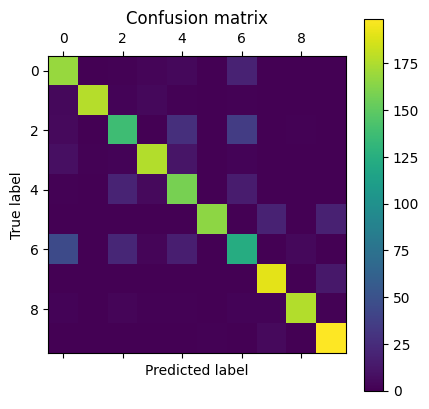

In [31]:
# Nothing to do here, just run the cell.
knn_acc, knn_time = get_evaluation(knn_model, X_test, y_test)

<h3 style="color:rgb(210,90,80)">4.2 Code (10 Points):</h3>

In [32]:
def train_SVM(X_train: np.ndarray, y_train: np.ndarray, C: float, kernel: str, gamma: str, seed: int) -> SVC:
    """ Trains an SVM classifier on the given dataset.
    
    Important: Again use the sklearn implementation provided, and don't forget to set the seed.
    
    Parameters
    ----------
    X_train : (N, K) np.ndarray
        Data matrix used for fitting the classifier.
    y_train : (N,) np.ndarray
        Labels of the train data.
    C : float
        SVM parameter for regularization.
    kernel : str
        SVM parameter for the type of kernel being.
    gamma : str
        SVM parameter for kernel coefficient.
    seed : int
        Seed for reproducibility.

    Returns
    -------
    model : SVC
        The fitted classifier.
    """
    # YOUR CODE HERE
    # 初始化 SVM 分类器，设置随机种子
    svm = SVC(C=C, kernel=kernel, gamma=gamma, random_state=seed)
    
    # 在训练数据上训练模型
    svm.fit(X_train, y_train)
    
    return svm

In [33]:
# DO NOT DELETE THIS CELL!
svm_model = train_SVM(X_train, y_train, 10, 'poly', 'auto', RSEED)
assert isinstance(svm_model, SVC), "The returned model is not a SVC!"
assert svm_model.C == 10, "The regularization parameter 'C' is wrong!"
assert svm_model.kernel == "poly", "The 'kernel' parameter is wrong!"
assert svm_model.gamma == "auto", "The 'gamma' parameter is wrong!"


Accuracy of classifier on test image data:  0.8295

Confusion matrix: 
 [[150   1   5   5   3   0  30   0   0   1]
 [  0 183   0   2   1   0   3   0   0   0]
 [  7   0 145   3  26   0  22   0   2   0]
 [ 10   4   1 175   7   0   3   0   0   0]
 [  0   1  32   7 146   0  12   0   1   0]
 [  0   0   1   0   0 177   0  15   1   8]
 [ 34   1  24   9  13   0 128   0   4   0]
 [  0   0   0   0   0  10   0 182   0  12]
 [  3   0   0   1   0   1   2   0 180   1]
 [  0   0   0   0   0   3   0   9   0 193]]

Time:  1.8202993869781494



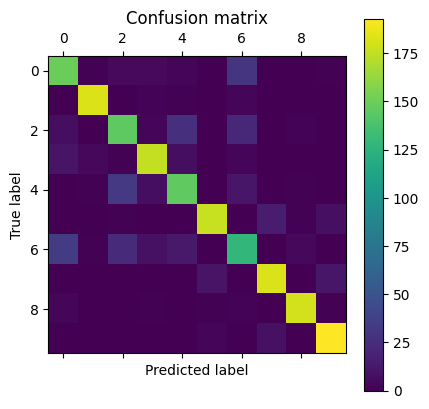

In [34]:
# Nothing to do here, just run the cell.
svm_acc, svm_time = get_evaluation(svm_model, X_test, y_test)

<h3 style="color:rgb(210,90,80)">Plot 4.3 (7 Points):</h3>

In [35]:
def plot_accuracies(accuracies: list[float]):
    """Creates a bar-plot from the classifier accuracies with a range of [0, 1] on the y-axis.

    Parameters
    ----------
    accuracies : list
        List of 4 accuracies from the previous exercises.
            - dec_tree_fixed : float
                Accuracy of the decision tree with fixed parameters.
            - dec_tree_bets : float
                Accuracy of the decision tree with best parameters.
            - kNN : float
                Accuracy of the kNN classifier.
            - SVM : float
                Accuracy of the SVM classifier.
    """
    # YOUR CODE HERE
    classifiers = ['Decision Tree (Fixed)', 'Decision Tree (Best)', 'KNN', 'SVM']
    colors = ['skyblue', 'salmon', 'lightgreen', 'plum']
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(classifiers, accuracies, color=colors)
    
    # 添加数值标签
    for bar, acc in zip(bars, accuracies):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01, f'{acc:.2f}', ha='center', va='bottom', fontsize=12)
    
    plt.ylim(0, 1)
    plt.ylabel('Accuracy', fontsize=14)
    plt.title('Classifier Accuracies on Fashion MNIST Test Set', fontsize=16)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [36]:
def plot_times(times: list[float]):
    """Creates a bar-plot from the classifier inference times using the log-scale on the y-axis.

    Parameters
    ----------
    times : list
        List of 4 inference times from the previous exercises.
            - dec_tree_fixed : float
                Inference time of the decision tree with fixed parameters.
            - dec_tree_bets : float
                Inference time of the decision tree with best parameters.
            - kNN : float
                Inference time of the kNN classifier.
            - SVM : float
                Inference time of the SVM classifier.
    """
    # YOUR CODE HERE
    classifiers = ['Decision Tree (Fixed)', 'Decision Tree (Best)', 'KNN', 'SVM']
    colors = ['skyblue', 'salmon', 'lightgreen', 'plum']
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(classifiers, times, color=colors)
    
    # 添加数值标签
    for bar, t in zip(bars, times):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height * 1.05, f'{t:.4f}s', ha='center', va='bottom', fontsize=12)
    
    plt.yscale('log')
    plt.ylabel('Inference Time (s, log scale)', fontsize=14)
    plt.title('Classifier Inference Times on Fashion MNIST Test Set', fontsize=16)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

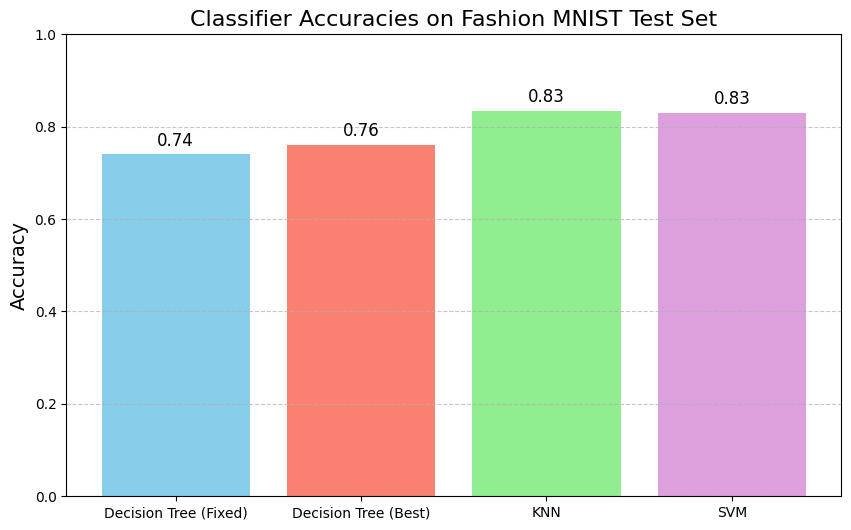

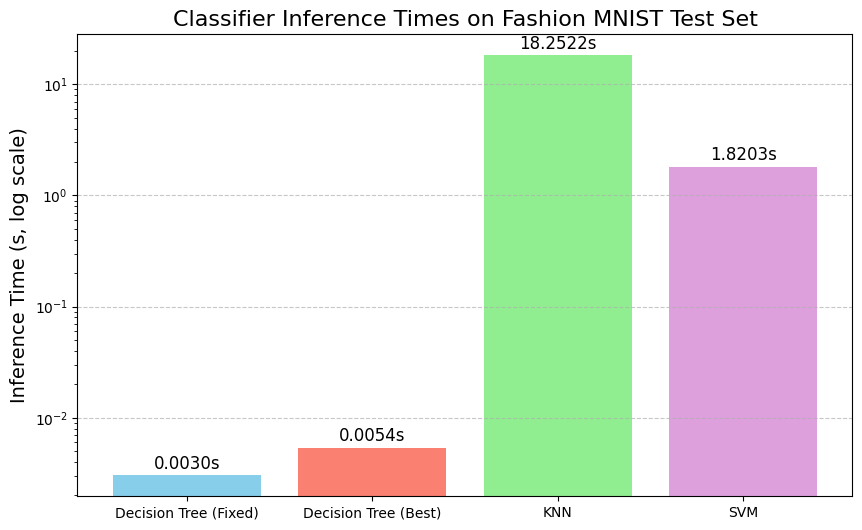

In [37]:
# Nothing to do here, just run the cell.
accuracies = [acc_fixed, acc_best, knn_acc, svm_acc]
times = [time_fixed, time_best, knn_time, svm_time]

plot_accuracies(accuracies)
plot_times(times)

<h3 style="color:rgb(210,90,80)">Question 4.3 (3 Points):</h3>

***Are the following observations correct?***

According to the plots above:

a4_) The decision tree model is faster in terms of inference time and yields a better accuracy than kNN and SVM. <br>
b4_) SVM performs significantly better than kNN.<br>
c4_) On such a large dataset, the SVM with kernel has higher inference time than the decision tree, as expected.

To answer the question, assign `True` or `False` boolean values to variables in the next cell. For example, if you think that **a4_)** is correct, define a variable `a4_` and set it to `True`, the same applies to **b4_)** and the other options. A non-correctly answered question as well as no answer (i.e. answer “None”) yields 0 points for a specific question.<br>

In [39]:
# YOUR CODE HERE
a4_ = False
b4_ = True
c4_ = True

In [40]:
# DO NOT DELETE THIS CELL!
assert a4_ is not None, "Store True/False!"
assert a4_ in [True, False], "Invalid Answer!"

In [41]:
# DO NOT DELETE THIS CELL!
assert b4_ is not None, "Store True/False!"
assert b4_ in [True, False], "Invalid Answer!"

In [42]:
# DO NOT DELETE THIS CELL!
assert c4_ is not None, "Store True/False!"
assert c4_ in [True, False], "Invalid Answer!"

<h2 style="color:rgb(0,120,170)">Task 5: Preparation towards ensembles of trees</h2>

In the upcoming lectures, you will discuss ensemble methods for trees that aggregate and/or average single tree models to achieve better performances and/or faster runtimes compared to the ones we used here. Random Forest is a famous example where we average over trees such that the overall variance (of the average) is reduced. We will now formalize the situation:

Let's say you have $X_1,...,X_B$ identically distributed random variables which are NOT necessarily independent. Let us denote the variance of a single variable $X_i$ by $\sigma^2$ and the correlation coefficient between two $X_i$ and $X_j$ for $j \ne i$ by $\rho=\frac{E(X_i X_j)-E(X_i)E(X_j)}{\sigma^2}$ (keep in mind that all $X_i$'s are identically distributed!). 

In **Calculation 5.1**, show that $$\text{Var}\left(\frac{1}{B} \sum_{i=1}^B X_i \right)=\rho \sigma^2 +\frac{1-\rho}{B} \sigma^2. \quad (1)$$
This gives some intuition about how to control the overall variance of averages. One can reduce it e.g. by a small correlation coefficient $\rho$ and a large number of models $B$.

1. Apply the definition of the variance to the given average. 
2. Split up the resulting double sum in parts with equal and unequal indices. 
3. Apply the definition for $\rho$ and replace the sums with the number of occurences of the respective term (how often the indices appear).
4. Rewrite this to get the desired solution.

**Note:** Denote in your calculation where you tackle each of this points.

<h3 style="color:rgb(210,90,80)">Calculation 5.1 (15 Points):</h3>

YOUR ANSWER HERE

Step 1: Apply the definition of the variance to the given average.

$$
\text{Var}\left(\frac{1}{B} \sum_{i=1}^B X_i \right) = \frac{1}{B^2} \text{Var}\left( \sum_{i=1}^B X_i \right)
$$

Step 2: Split up the resulting double sum into parts with equal and unequal indices.

$$
\text{Var}\left( \sum_{i=1}^B X_i \right) = \sum_{i=1}^B \text{Var}(X_i) + \sum_{i \neq j} \text{Cov}(X_i, X_j)
$$

Step 3: Apply the definition for $\rho$ and replace the sums with the number of occurrences of the respective terms.

Assume that $\text{Var}(X_i) = \sigma^2$ and $\text{Cov}(X_i, X_j) = \rho \sigma^2$ for $i \neq j$,

$$
\sum_{i=1}^B \text{Var}(X_i) = B \sigma^2
$$

$$
\sum_{i \neq j} \text{Cov}(X_i, X_j) = B(B-1) \rho \sigma^2
$$

Step 4: Rewrite this to get the desired solution.

$$
\text{Var}\left(\frac{1}{B} \sum_{i=1}^B X_i \right) = \frac{1}{B^2} \left( B \sigma^2 + B(B-1) \rho \sigma^2 \right) = \rho \sigma^2 + \frac{1 - \rho}{B} \sigma^2
$$